*TL;DR - This blog post introduces a new function in the malariagen_data Python package for investigating potential insecticide resistance mutations. This is cross-posted from [Sanjay Nagi's blog](https://www.sanjaycnagi.com/blog/2024-08-15-diplotype-clustering/), Sanjay did most of the work on this but it was a pleasure to collaborate.*

<p><hr/></p>

Vectors of disease evolve rapidly in response to the interventions we throw at them. By monitoring genetic changes in these populations over time, we can detect emerging insecticide resistance mechanisms and monitor the spread of known mechanisms, with the aim of informing vector control strategies. In a world of limited active ingredients, this surveillance will be crucial for maintaining the effectiveness of front-line interventions like long-lasting insecticide-treated bed nets (LLINs) and indoor residual spraying (IRS).

To facilitate this, we have been developing systems and tools for genomic surveillance. The [MalariaGEN Vector Observatory](https://www.malariagen.net/vobs) have developed the Python package [malariagen_data](https://malariagen.github.io/malariagen-data-python/latest/), which provides tools for accessing and analysing genomic datasets from major malaria vectors. By developing innovative software, we can help to build capacity in genomic research, allowing more people to perform robust, complex genomic analyses that would otherwise be limited to a select few.

In this blog post, we wanted to share a new function that we have recently added to malariagen_data: [plot_diplotype_clustering_advanced()](https://malariagen.github.io/malariagen-data-python/latest/generated/malariagen_data.ag3.Ag3.plot_diplotype_clustering_advanced.html#malariagen_data.ag3.Ag3.plot_diplotype_clustering_advanced). This method allows us to rapidly zoom in on a genome region of interest and identify selective sweeps, assess their size, detect potential gene flow events between countries or species, and investigate whether sweeps are driven by copy number variants (CNVs), amino acid mutations or both.

But what exactly are diplotypes, and why are they useful? A diplotype, sometimes referred to as a multi-locus genotype, is essentially the combination of two haplotypes from a single mosquito - one from each chromosome - at a particular genomic region. By analysing diplotypes rather than haplotypes, we can better capture the full genetic variation present in an individual, including complex structural variants like CNVs that can be difficult to phase onto haplotypes. Often, CNVs and multiallelic SNPs are ignored when analysing haplotype data. The more mosquitoes we sequence, the worse this problem gets - *An. gambiae* s.l. is so genetically diverse, eventually, a significant proportion of all SNPs become multiallelic.

<img src="https://www.sanjaycnagi.com/_next/image/?url=%2Fblog%2Fdiplotype.png&w=3840&q=100" width="600"/>

The new diplotype clustering functionality in malariagen_data performs hierarchical clustering on diplotypes from a specified genomic region. It then visualises the results, displaying:

 1. The clustering dendrogram
 2. Sample metadata (e.g., species, collection location)
 3. Heterozygosity of each sample (within this genomic region)
 4. Copy number at genes of interest
 5. Amino acid variants in a specified transcript

## A case study

To illustrate the power of this approach, let's look at a case study of the *Gste2* gene from some recent whole-genome data of *An. gambiae* s.l from Obuasi, central Ghana. *Anopheles* mosquitoes from this area are highly resistant to multiple classes of insecticides ([Mugenzi et al. 2022](https://bmcinfectdis.biomedcentral.com/articles/10.1186/s12879-022-07795-4)). The *Gste2* gene is known to be involved in resistance to DDT (and potentially other insecticides), through either copy number variation ([Lucas et al. 2019](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6673711/)), amino acid mutations ([Mitchell et al. 2014](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3968025/)), or both. *Gste2*-I114T and *Gste2*-L119V are the major amino acid mutations at this locus known to confer resistance.

Here is an example of a plot generated by the `plot_diplotype_clustering_advanced()` function:

<img src="https://www.sanjaycnagi.com/_next/image/?url=%2Fblog%2Fdipclust-gste2.png&w=3840&q=100"/>

We've annotated this figure with some diplotype clusters which are particularly interesting. For example, cluster B contains a large number of diplotypes which are all genetically identical and have very low heterozygosity - this is what you expect when a selective sweep has occurred, and you find many individuals that are homozygous for the haplotype under selection. All individuals in cluster B also carry the *Gste2*-I114T substitution. If we did not already know something about this mutation, this figure would give us a clue that the mutation is a potential driver of selection and insecticide resistance. In fact, we already know this mutation causes insecticide resistance, so it is no surprise to find it linked to a selective sweep in this dataset.

We can also see another large cluster (cluster C) which does not harbour either I114T or L119V, but instead, the *Gste2*-F120L mutation. This cluster is homozygous for F120L and shows low heterozygosity, again indicative of diplotypes which have two copies of the same swept haplotype. Two things about the *Gste2*-F120L mutation are convincing as a potential driver of resistance. Firstly, it is in very close physical proximity to known resistance mutations in codons 114 and 119. According to [Riveron et al. (2014)](https://genomebiology.biomedcentral.com/articles/10.1186/gb-2014-15-2-r27), the 120 codon is located at the active site of the enzyme and is therefore likely to interact with the insecticide. Secondly, there are no CNVs associated with this sweep, and no other amino acid variants except N3K, which is less likely to be causative due to its physical location away from the active site.

We also observe a small cluster of individuals (cluster A) which harbour a copy number variant (CNV) spanning *Gste2*, *Gste1*, *Gste3* and *Gste7*. CNVs could be driving insecticide resistance by increasing the expression of the genes they encompass, allowing the mosquito to detoxify more of the insecticide as a result. This CNV, an amplification, seems to exist at a variable copy number. In total, we can see six or seven distinct CNVs in these samples.

This case study demonstrates how diplotype clustering can provide insights into the mutations causing insecticide resistance; in a single snapshot, we can explore amino acid and CNV data and really understand the nature of selection at a genomic region.

Here is the code which was used to generate the figure above. The function generates a Plotly figure, which is interactive and can be panned and zoomed as well as hovering to see some additional data.

In [1]:
# ensure plotly plots render in blog post output
import plotly.io as pio
pio.renderers.default = "notebook_connected+plotly_mimetype"

In [2]:
# setup
import malariagen_data
ag3 = malariagen_data.Ag3(
    show_progress=False,  # hide progress messages for the blog post
)

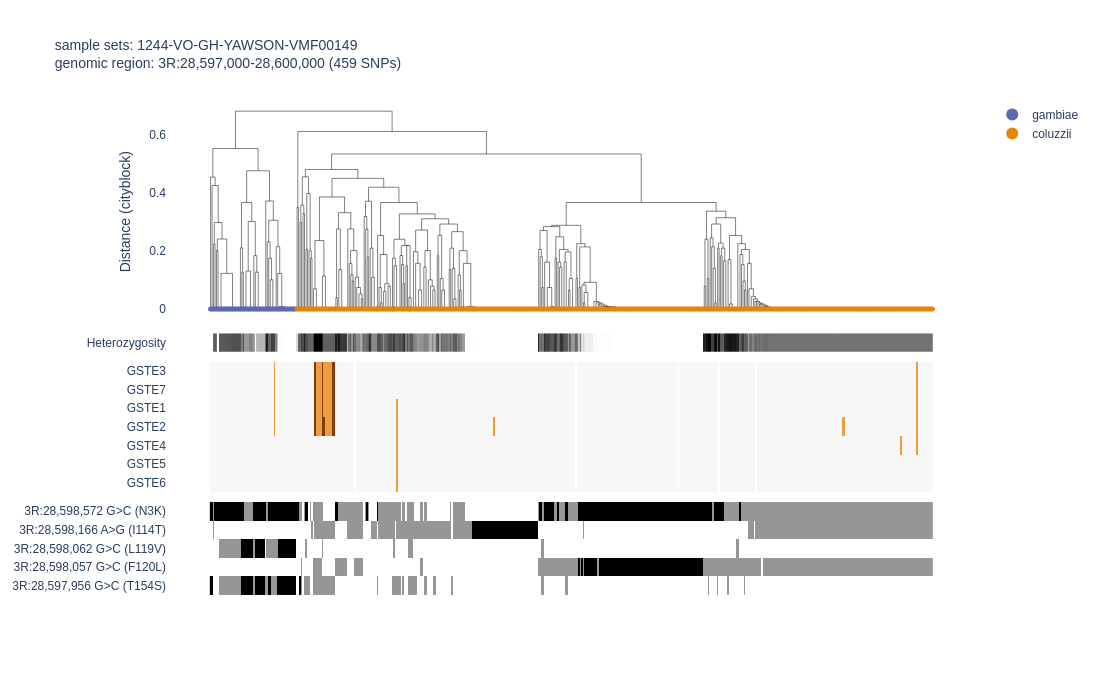

In [3]:
# example function call
ag3.plot_diplotype_clustering_advanced(
    region="3R:28,597,000-28,600,000",         # The genomic region for clustering
    cnv_region="3R:28,594,000-28,605,000",     # The genomic region for CNV data
    snp_transcript="AGAP009194-RA",            # The transcript for amino acid variants
    sample_sets="1244-VO-GH-YAWSON-VMF00149",  # The sample set
    sample_query=None,                         # A query to filter samples
    site_mask="gamb_colu",                     # The site mask to use
    linkage_method="complete",                 # The linkage method to use
    color="taxon",                             # The metadata column to determine color
)

---

We hope that others will find it useful for their own research. Please feel free to get in touch if you have any questions or feedback :)